In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Cars Company.csv') 

#### 1. Check and Drop Duplicate Records

In [4]:
print(df.shape)

(11914, 16)


In [5]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records: {duplicate_count}")

Number of duplicate records: 715


In [6]:
print("Sample duplicate records (if any):")
print(df[df.duplicated()].head())

Sample duplicate records (if any):
    Make     Model  Year             Engine Fuel Type  Engine HP  \
14   BMW  1 Series  2013  premium unleaded (required)      230.0   
18  Audi       100  1992             regular unleaded      172.0   
20  Audi       100  1992             regular unleaded      172.0   
24  Audi       100  1993             regular unleaded      172.0   
25  Audi       100  1993             regular unleaded      172.0   

    Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14               6.0            MANUAL   rear wheel drive              2.0   
18               6.0            MANUAL  front wheel drive              4.0   
20               6.0            MANUAL  front wheel drive              4.0   
24               6.0            MANUAL  front wheel drive              4.0   
25               6.0            MANUAL  front wheel drive              4.0   

       Market Category Vehicle Size Vehicle Style  highway MPG  city mpg  \
14  Luxury,

In [7]:
df = df.drop_duplicates()

In [8]:
print(f"Data shape after removing duplicates: {df.shape}")

Data shape after removing duplicates: (11199, 16)


#### 2. Check and Drop missing or null values

In [10]:
print(df.shape)

(11199, 16)


In [11]:
missing_values = df.isnull().sum()
print("Missing (null) values in each column:\n", missing_values)

Missing (null) values in each column:
 Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [12]:
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing}")


Total missing values in the dataset: 3484


In [13]:
df = df.dropna()

In [14]:
print(f"\nData shape after dropping missing values: {df.shape}")


Data shape after dropping missing values: (7735, 16)


#### 3. What are the top 10 average MSRP (Price) per car brand (rounded figure)? with Horizontal Bar Plot

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
top_10_avg_msrp = df.groupby('Make')['MSRP'].mean().round().sort_values(ascending=False).head(10)

In [39]:
print(top_10_avg_msrp)

Make
Bugatti         1757224.0
Maybach          546222.0
Rolls-Royce      351131.0
Lamborghini      331567.0
Bentley          247169.0
McLaren          239805.0
Ferrari          237384.0
Spyker           214990.0
Aston Martin     198123.0
Maserati         113684.0
Name: MSRP, dtype: float64


In [41]:
print("Top 10 Average MSRP per Car Brand:\n")
print(top_10_avg_msrp)

Top 10 Average MSRP per Car Brand:

Make
Bugatti         1757224.0
Maybach          546222.0
Rolls-Royce      351131.0
Lamborghini      331567.0
Bentley          247169.0
McLaren          239805.0
Ferrari          237384.0
Spyker           214990.0
Aston Martin     198123.0
Maserati         113684.0
Name: MSRP, dtype: float64


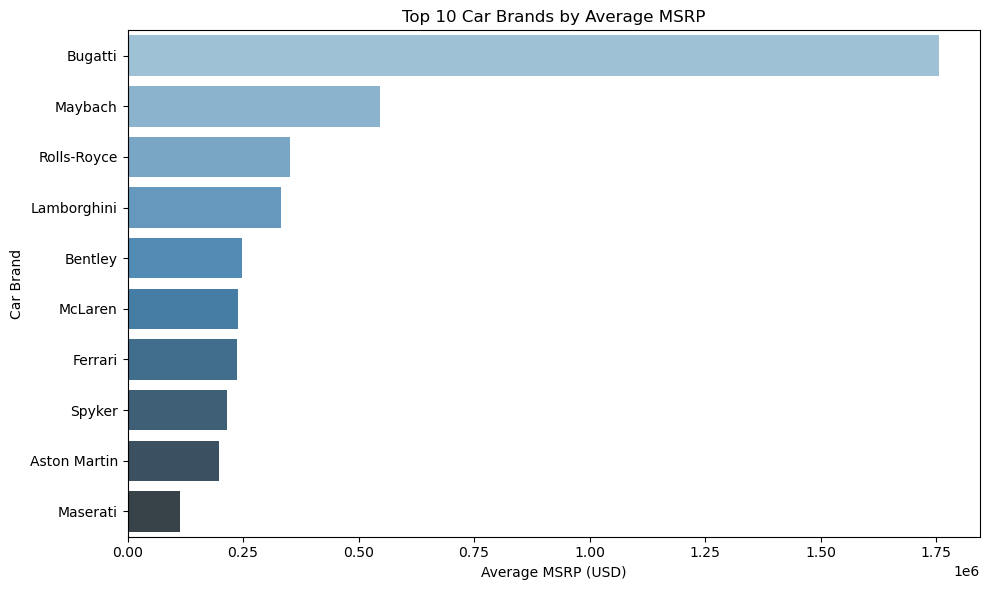

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_avg_msrp.values, 
    y=top_10_avg_msrp.index, 
    hue=top_10_avg_msrp.index, 
    palette='Blues_d', 
    legend=False
)
plt.title('Top 10 Car Brands by Average MSRP')
plt.xlabel('Average MSRP (USD)')
plt.ylabel('Car Brand')
plt.tight_layout()
plt.show()


#### 4. How has the MSRP (price) changed over the years (rounded figure)? with Line Plot

In [47]:

msrp_by_year = df.groupby('Year')['MSRP'].mean().round()

print("Average MSRP by Year:\n")
print(msrp_by_year)


Average MSRP by Year:

Year
1990     2073.0
1991     2223.0
1992     2192.0
1993     2401.0
1994     2726.0
1995     3270.0
1996     3140.0
1997     4524.0
1998     4434.0
1999     3612.0
2000     3913.0
2001    73833.0
2002    55704.0
2003    68312.0
2004    55908.0
2005    53724.0
2006    39001.0
2007    41173.0
2008    80462.0
2009    59193.0
2010    60152.0
2011    65663.0
2012    71837.0
2013    55201.0
2014    71196.0
2015    52613.0
2016    52580.0
2017    45333.0
Name: MSRP, dtype: float64


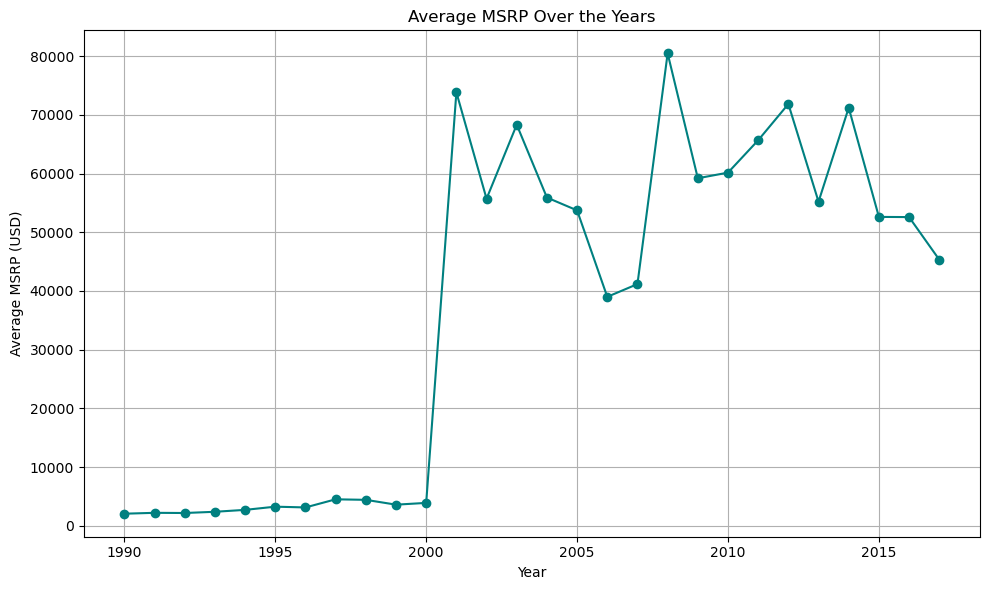

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(msrp_by_year.index, msrp_by_year.values, marker='o', linestyle='-', color='teal')
plt.title('Average MSRP Over the Years')
plt.xlabel('Year')
plt.ylabel('Average MSRP (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5. How Engine HP (power) and MPG (efficiency) have changed over the years? show with two line plots

Hint: Average of (city mpg + highway MPG)

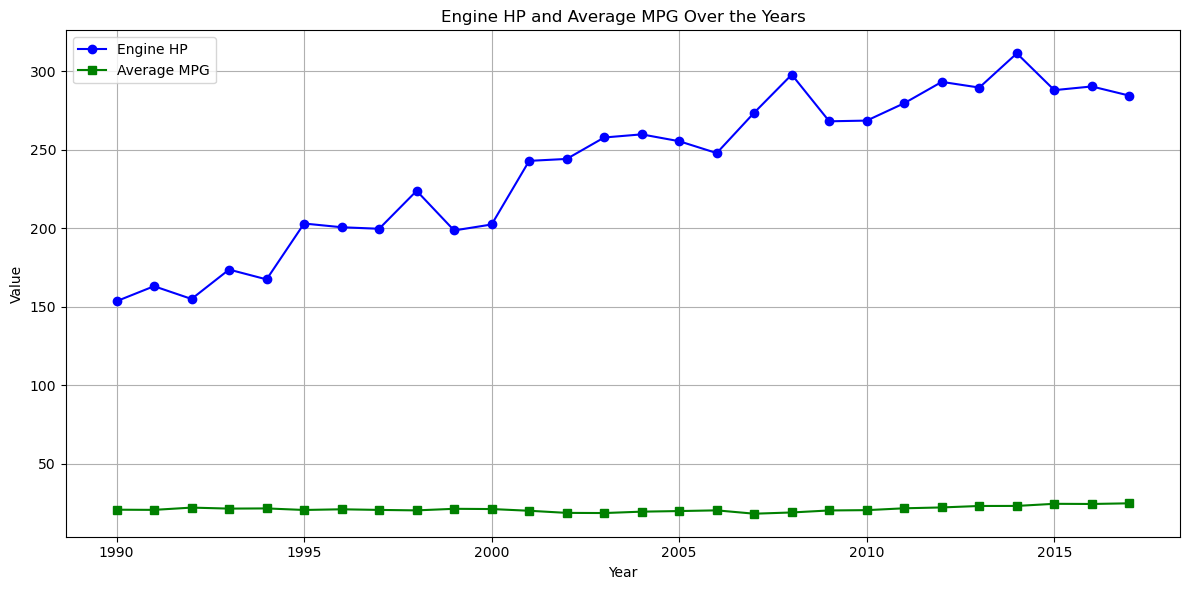

In [55]:
df['Avg MPG'] = (df['city mpg'] + df['highway MPG']) / 2

yearly_stats = df.groupby('Year')[['Engine HP', 'Avg MPG']].mean()

plt.figure(figsize=(12, 6))

plt.plot(yearly_stats.index, yearly_stats['Engine HP'], marker='o', label='Engine HP', color='blue')
plt.plot(yearly_stats.index, yearly_stats['Avg MPG'], marker='s', label='Average MPG', color='green')

plt.title('Engine HP and Average MPG Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### 6. What percentage of cars are Compact, Midsize, or Large? Show with Pie chart

In [57]:
df.columns = df.columns.str.strip().str.lower()
print("Available Vehicle Sizes:\n", df['vehicle size'].unique())

Available Vehicle Sizes:
 ['Compact' 'Midsize' 'Large']


In [59]:
size_counts = df['vehicle size'].value_counts(normalize=True) * 100
filtered_sizes = size_counts.loc[['Compact', 'Midsize', 'Large']]

print("Percentage of Compact, Midsize, and Large vehicles:\n")
print(filtered_sizes.round(2))


Percentage of Compact, Midsize, and Large vehicles:

vehicle size
Compact    36.81
Midsize    39.34
Large      23.85
Name: proportion, dtype: float64


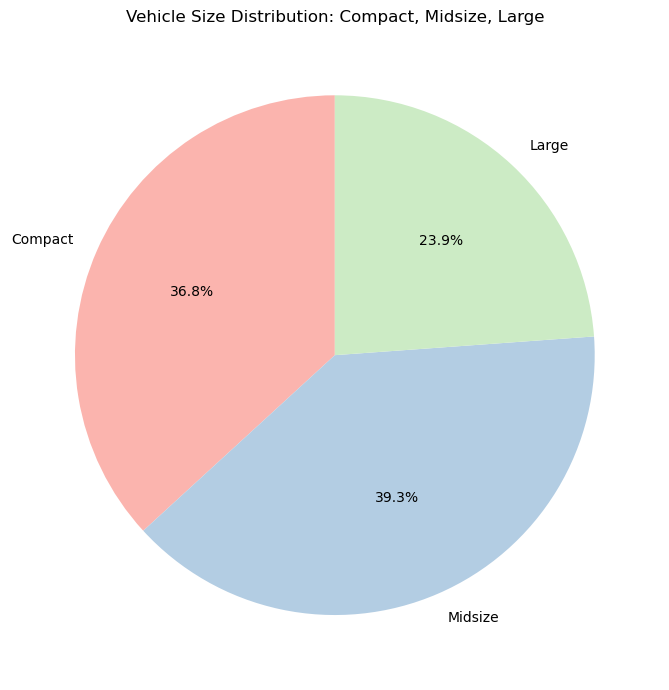

In [61]:
plt.figure(figsize=(7, 7))
filtered_sizes.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors
)
plt.title('Vehicle Size Distribution: Compact, Midsize, Large')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### 7. Which vehicle styles are sold the most? show with vertical bar plot

In [63]:
df.columns = df.columns.str.strip().str.lower()
style_counts = df['vehicle style'].value_counts()

print("Vehicle Style Counts:\n")
print(style_counts)


Vehicle Style Counts:

vehicle style
4dr SUV                2053
Sedan                  1801
Coupe                   922
Convertible             645
4dr Hatchback           639
2dr Hatchback           409
Wagon                   349
Crew Cab Pickup         334
Extended Cab Pickup     187
Regular Cab Pickup      176
Passenger Van           100
Passenger Minivan        61
Cargo Van                34
2dr SUV                  14
Convertible SUV           6
Cargo Minivan             5
Name: count, dtype: int64


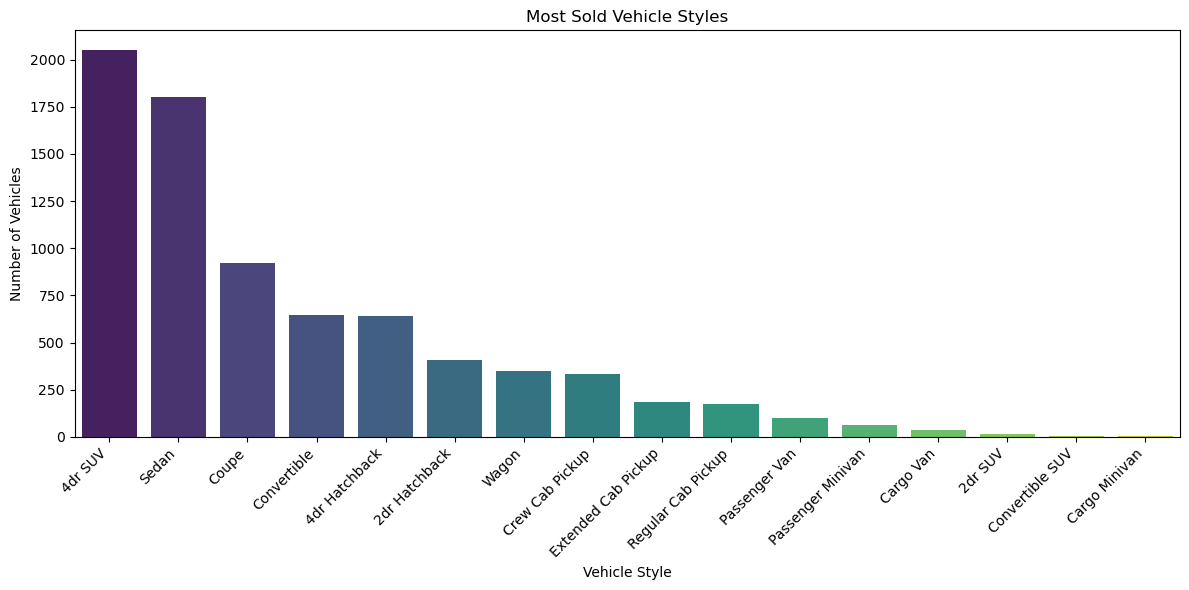

In [67]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=style_counts.index, 
    y=style_counts.values, 
    hue=style_counts.index,    
    palette='viridis', 
    legend=False                
)

plt.title('Most Sold Vehicle Styles')
plt.xlabel('Vehicle Style')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 8. Which car brands have the most vehicles priced at $40,000 or more and with a popularity score of at least 1000?

In [69]:

df.columns = df.columns.str.strip().str.lower()
filtered_df = df[(df['msrp'] >= 40000) & (df['popularity'] >= 1000)]
brand_counts = filtered_df['make'].value_counts()

print("Car brands with vehicles priced $40K+ and popularity ≥ 1000:\n")
print(brand_counts)


Car brands with vehicles priced $40K+ and popularity ≥ 1000:

make
Cadillac       354
BMW            269
Audi           224
Chevrolet      171
Porsche        123
Ford           105
Nissan          69
Ferrari         68
Lamborghini     52
Toyota          50
Dodge           49
Kia             16
Hyundai         13
Chrysler        12
Honda            8
Name: count, dtype: int64
